In [16]:
import torch
import torch.nn as nn # 신경망에 필요한 요소들을 포함
import torch.nn.functional as F # 신경망에서 사용되는 기본 함수들을 포함
import torch.optim as optim # 옵티마이저를 포함(경사하강법 알고리즘 포함)
import torch.nn.init as init

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [17]:
#학습을 gpu에서 할껀지, cpu에서 할 것인지 정하는 것
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [18]:
#기본적인 텐서의 생성과, 기울기 구하기
x = torch.tensor(data = [1.0,2.0], device = device, dtype = torch.float32, requires_grad = True)
y = x**2

target = torch.tensor([4.0, 9.0], device=device, dtype=torch.float32)
loss = torch.sum(torch.abs(y-target))
loss.backward()

print(x.grad)

tensor([-2., -4.], device='cuda:0')


In [87]:
#선형회귀 분석 모델
num_data  = 1000
num_epoch = 10000

#데이터
x = init.uniform_(torch.Tensor(num_data,1),-10,10) #data

#레이블
y = 2*x+3 #참값
noise = init.normal_(torch.Tensor(num_data,1),std=1,mean=0)
label = y + noise #여기서 노이즈를 추가하는이유는 어떠한 관측에서도 노이즈가 없을수가 없음을 구현한 것 없어도 무관하다.

#모델
model = nn.Linear(1,1) #input oupt이 1개씩인 선형 모델
loss_func = nn.L1Loss() #절대값 평균 loss
optimizer = optim.SGD(model.parameters(), lr = 0.001) #수치 경사 하강법


In [88]:
#학습
for i in range(num_epoch):
    optimizer.zero_grad() #각 epoch 시행시 기울기를 0으로 바꿔줌 이거 안바꾸면 기울기 구한거 자꾸 더하기됨
    
    output = model(x) #모델에서 결과를 뽑고
    loss = loss_func(output, label) #모델에서 loss를 구합니다.
    loss.backward() #구해준 loss를부터 기울기를 구하고 
    optimizer.step() # 기울기에 lr에 따라 파라미터들을 업데이트 해줍니다.

    if i%10 == 0:
        #print(loss.data)
        pass

true : 2x + 3
result : 1.99 x + 3.05


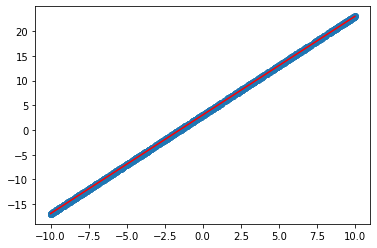

In [93]:
#결과
param_list = list(model.parameters())
print("true : 2x + 3")
print(f"result : {param_list[0].item():.3} x + {param_list[1].item():.3}")

#plot
plt.scatter(x,y) #data

x_infer = torch.tensor(data = [-10,10]) #infer
y_infer = param_list[0].item() * x_infer + param_list[1].item()
plt.plot(x_infer,y_infer,'-r')

plt.show()